In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

import pydotplus
import io
from scipy import misc

import os     
os.environ["PATH"] += os.pathsep + 'C:/Users/pooja/Anaconda3/Lib/site-packages/graphviz/'

%matplotlib inline


Spotify Song Attributes EDA
- import Dataset
- EDA to visualize data and observe structure
- Train a classifier (Decision Tree)
- Predict target using the trained classifier

In [3]:
spotify_data = pd.read_csv('data.csv')
type(spotify_data)

pandas.core.frame.DataFrame

In [4]:
spotify_data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [27]:
spotify_data.target.unique()

array([1, 0])

In [5]:
spotify_data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
spotify_data.head(100)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.034400,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.604000,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.180000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.020200,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.048100,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.002080,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [7]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [8]:
train,test= train_test_split(spotify_data,test_size=0.15)

In [9]:
print("Training_size = {} ; Test_size = {}" .format(len(train),len(test)))

Training_size = 1714 ; Test_size = 303


In [10]:
print("shape of training dataset",train.shape)
print("Shape of test dataset", test.shape)

shape of training dataset (1714, 17)
Shape of test dataset (303, 17)


In [11]:
# Custom Color Palette
green_red = ['#58D68D','#EF4846']
palette = sns.color_palette(green_red)
sns.set_palette(palette)
sns.set_style("white")

In [12]:
_ih[-5:] # to get the last 5 deleted cells

['train,test= train_test_split(spotify_data,test_size=0.15)',
 'print("Training_size = {} ; Test_size = {}" .format(len(train),len(test)))',
 'print("shape of training dataset",train.shape)\nprint("Shape of test dataset", test.shape)',
 '# Custom Color Palette\ngreen_red = [\'#58D68D\',\'#EF4846\']\npalette = sns.color_palette(green_red)\nsns.set_palette(palette)\nsns.set_style("white")',
 '_ih[-5:] # to get the last 5 deleted cells']

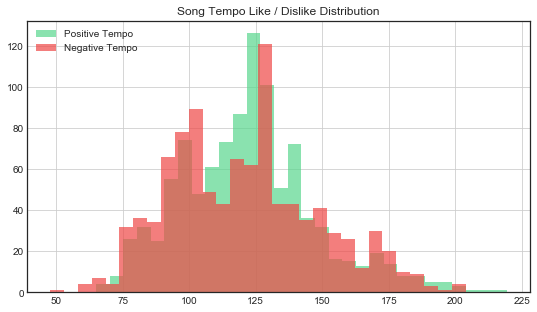

In [13]:
positive_tempo = spotify_data[spotify_data['target']== 1]['tempo']
negative_tempo= spotify_data[spotify_data['target']== 0]['tempo']


fig = plt.figure(figsize = (9,5))
plt.title("Song Tempo Like / Dislike Distribution")
positive_tempo.hist(alpha=0.7, bins = 30, label="Positive Tempo" )
negative_tempo.hist(alpha=0.7, bins = 30, label="Negative Tempo")
plt.legend(loc="upper left")

In [14]:
positive_tempo.head(10)

0    150.062
1    160.083
2     75.044
3     86.468
4    174.004
5     85.023
6     80.030
7    144.154
8    130.035
9     99.994
Name: tempo, dtype: float64

In [15]:
negative_tempo.head(10)

1020    143.919
1021     92.003
1022     88.541
1023     88.965
1024    104.986
1025    149.962
1026     84.009
1027     83.948
1028    120.037
1029     82.022
Name: tempo, dtype: float64

In [16]:
positive_tempo = spotify_data[spotify_data['target']== 1]['tempo']
negative_tempo = spotify_data[spotify_data['target']== 0]['tempo']

positive_dance = spotify_data[spotify_data['target']== 1]['danceability']
negative_dance = spotify_data[spotify_data['target']== 0]['danceability']

positive_duration_ms = spotify_data[spotify_data['target']== 1]['duration_ms']
negative_duration_ms = spotify_data[spotify_data['target']== 0]['duration_ms']

positive_loudness = spotify_data[spotify_data['target']== 1]['loudness']
negative_loudness = spotify_data[spotify_data['target']== 0]['loudness']

positive_speechiness = spotify_data[spotify_data['target']== 1]['speechiness']
negative_speechiness = spotify_data[spotify_data['target']== 0]['speechiness']

positive_valence = spotify_data[spotify_data['target']== 1]['valence']
negative_valence = spotify_data[spotify_data['target']== 0]['valence']

positive_energy = spotify_data[spotify_data['target']== 1]['energy']
negative_energy = spotify_data[spotify_data['target']== 0]['energy']

positive_acousticness = spotify_data[spotify_data['target']== 1]['acousticness']
negative_acousticness = spotify_data[spotify_data['target']== 0]['acousticness']

positive_key = spotify_data[spotify_data['target']== 1]['key']
negative_key = spotify_data[spotify_data['target']== 0]['key']

positive_instrumentalness = spotify_data[spotify_data['target']== 1]['instrumentalness']
negative_instrumentalness = spotify_data[spotify_data['target']== 0]['instrumentalness']


/Users/ghorbaj/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


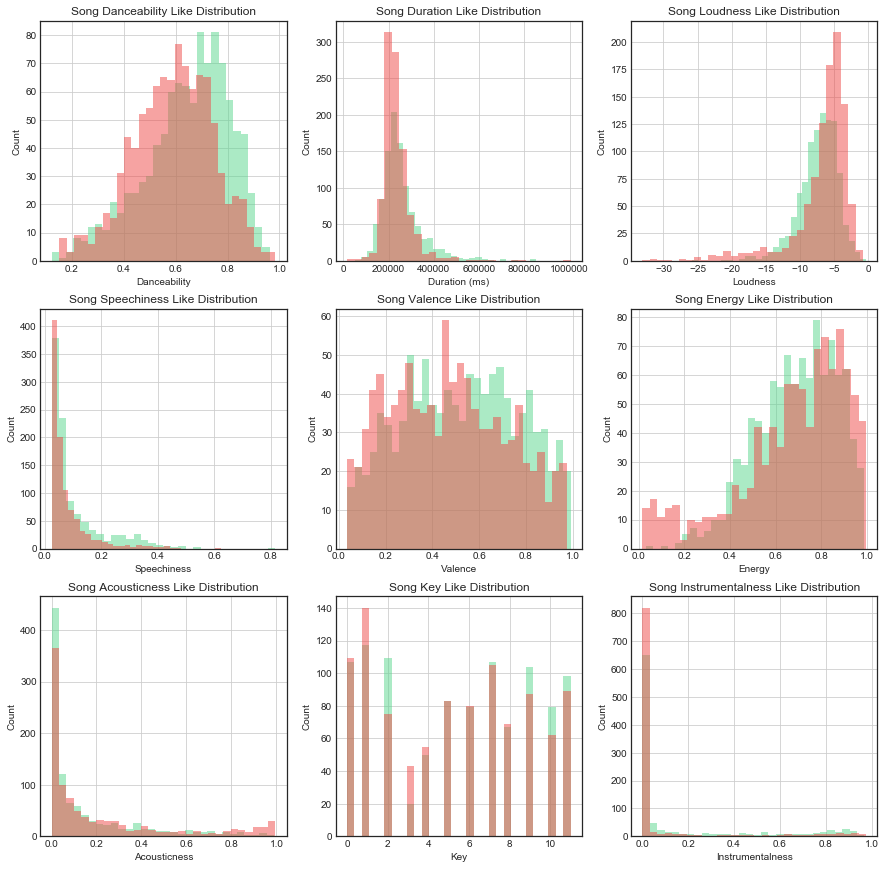

In [17]:

grid_fig = plt.figure(figsize = (15,15))

# Danceability
dan = grid_fig.add_subplot(331) # 3*3 grid at location 1 
dan.set_xlabel('Danceability')
dan.set_ylabel('Count')
dan.set_title('Song Danceability Like Distribution')
positive_dance.hist(alpha=0.5, bins=30)
dan1 = grid_fig.add_subplot(331)
negative_dance.hist(alpha=0.5, bins=30)



# Duration 
dur = grid_fig.add_subplot(332) # 3*3 grid at location 2 
dur.set_xlabel('Duration (ms)')
dur.set_ylabel('Count')
dur.set_title('Song Duration Like Distribution')
positive_duration_ms.hist(alpha=0.5, bins=30)
dur1 = grid_fig.add_subplot(332)
negative_duration_ms.hist(alpha=0.5, bins=30)



# Loudness
lou = grid_fig.add_subplot(333) # 3*3 grid at location 3 
lou.set_xlabel('Loudness')
lou.set_ylabel('Count')
lou.set_title('Song Loudness Like Distribution')
positive_loudness.hist(alpha=0.5, bins=30)
lou1 = grid_fig.add_subplot(333)
negative_loudness.hist(alpha=0.5, bins=30)


# Speechiness
spe = grid_fig.add_subplot(334) # 3*3 grid at location 4
spe.set_xlabel('Speechiness')
spe.set_ylabel('Count')
spe.set_title('Song Speechiness Like Distribution')
positive_speechiness.hist(alpha=0.5, bins=30)
spe1 = grid_fig.add_subplot(334)
negative_speechiness.hist(alpha=0.5, bins=30)


# Valence
val = grid_fig.add_subplot(335) # 3*3 grid at location 5
val.set_xlabel('Valence')
val.set_ylabel('Count')
val.set_title('Song Valence Like Distribution')
positive_valence.hist(alpha=0.5, bins=30)
val1 = grid_fig.add_subplot(335)
negative_valence.hist(alpha=0.5, bins=30)


# Energy
ene = grid_fig.add_subplot(336) # 3*3 grid at location 6 
ene.set_xlabel('Energy')
ene.set_ylabel('Count')
ene.set_title('Song Energy Like Distribution')
positive_energy.hist(alpha=0.5, bins=30)
ene1 = grid_fig.add_subplot(336)
negative_energy.hist(alpha=0.5, bins=30)


# Acousticness
aco = grid_fig.add_subplot(337) # 3*3 grid at location 7 
aco.set_xlabel('Acousticness')
aco.set_ylabel('Count')
aco.set_title('Song Acousticness Like Distribution')
positive_acousticness.hist(alpha=0.5, bins=30)
aco1 = grid_fig.add_subplot(337)
negative_acousticness.hist(alpha=0.5, bins=30)


# Key
key = grid_fig.add_subplot(338) # 3*3 grid at location 8 
key.set_xlabel('Key')
key.set_ylabel('Count')
key.set_title('Song Key Like Distribution')
positive_key.hist(alpha=0.5, bins=30)
key1 = grid_fig.add_subplot(338)
negative_key.hist(alpha=0.5, bins=30)


# Instrumentalness
ins = grid_fig.add_subplot(339) # 3*3 grid at location 9 
ins.set_xlabel('Instrumentalness')
ins.set_ylabel('Count')
ins.set_title('Song Instrumentalness Like Distribution')
positive_instrumentalness.hist(alpha=0.5, bins=30)
ins1 = grid_fig.add_subplot(339)
negative_instrumentalness.hist(alpha=0.5, bins=30)

In [18]:
c = DecisionTreeClassifier(min_samples_split=100)

In [19]:
features  = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness", "duration_ms"]

In [20]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]


In [21]:
dt = c.fit(x_train,y_train)
def show_tree(tree,features,path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f , feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"]= (20,20)
    plt.imshow(img)

/Users/ghorbaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


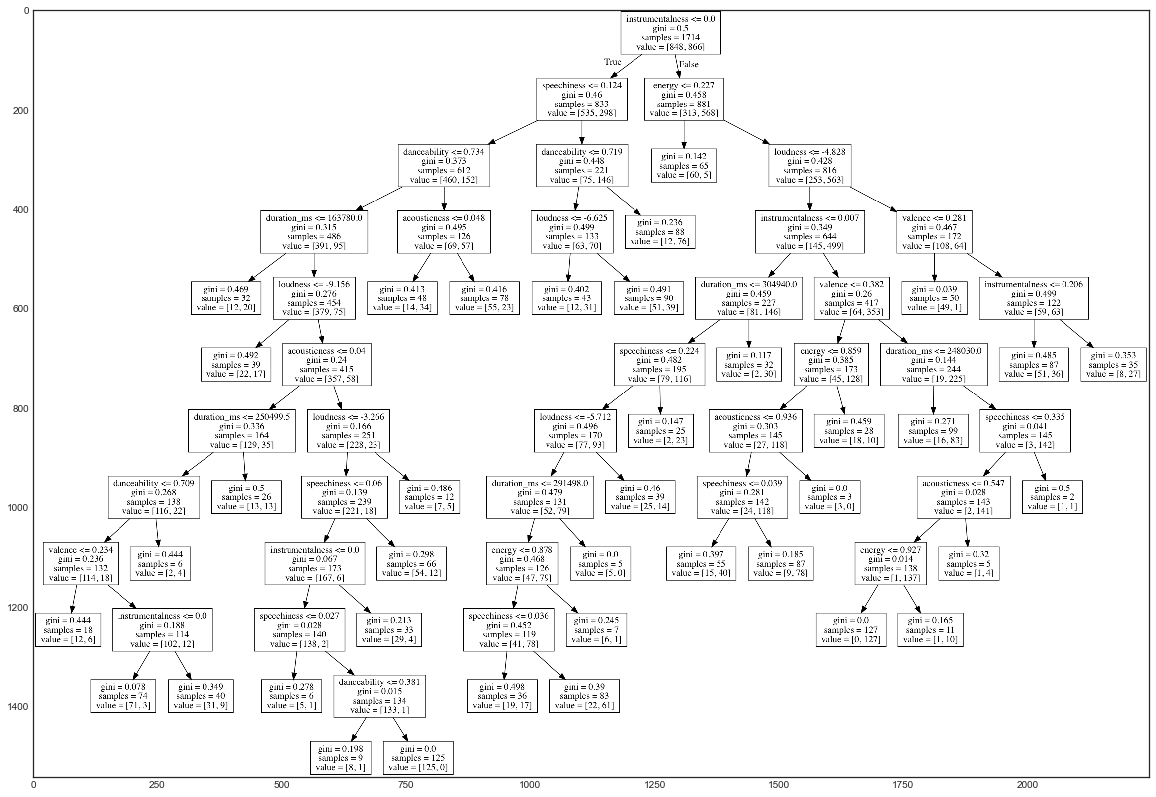

In [23]:
show_tree(dt, features, 'dec_tree_01.png')

In [24]:
y_pred = c.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)*100

In [26]:
print("Accuracy (Using Decision Tree) : ", round(score,1), "%")

Accuracy (Using Decision Tree) :  65.3 %
